In [3]:
require(plotly)
require(ggplot2)
require(gridExtra)

In [4]:
options(repr.matrix.max.rows = 1000)
options(repr.matrix.max.cols = 30)
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=16, repr.plot.height=8)

In [5]:
seriesFolder = 'data'
modelFolder  = 'model'
resultFolder = 'testResult'
imagesFolder = 'images'

Leitura Resultados
===

In [6]:
modelsLake = list.files(path = modelFolder, pattern = NULL, all.files = FALSE, full.names = TRUE, recursive = FALSE)

In [16]:
modelsName = c("fourier_" 
               #,"wavelet_" 
               ,"ssa_"
               #,"emdrp_"
               #,"emdmi_" 
               #,"forcedec_" 
               #,"forcedectopo_" 
               #,"forcedectimedomain_"
              )
listResult = list()
for(i in 1:length(modelsName)){
    models = modelsLake[grepl(modelsName[i], modelsLake)]
    testData = data.frame()
    for(j in 1:length(models)){
        load(models[j])
        testData = rbind(testData, model$eval)
    }
    listResult[[i]] = testData
}

Métrica: MDDL
===

pdf 
  2

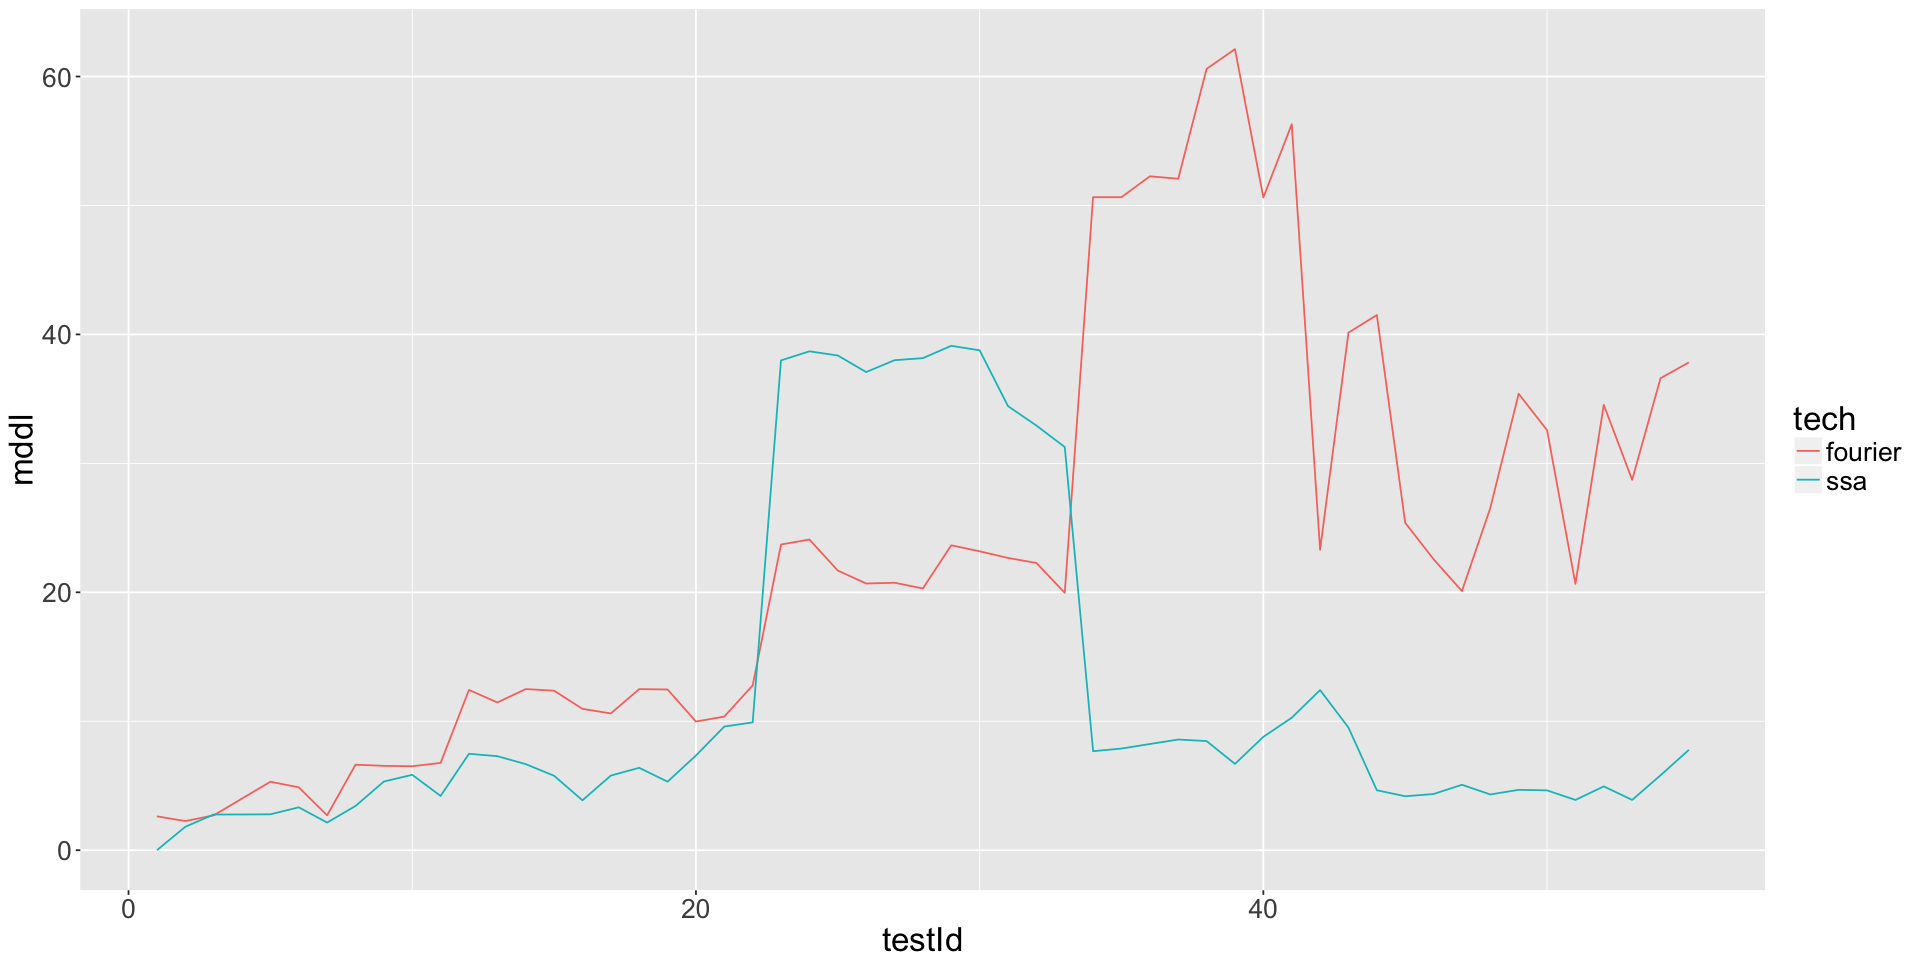

In [17]:

data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mddl.pdf", sep='/'), width=16, height=5)

In [18]:
n = 'mddl'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,23.334750828943,16.5112003087729
ssa,12.0263795627202,12.7643301883397


pdf 
  2

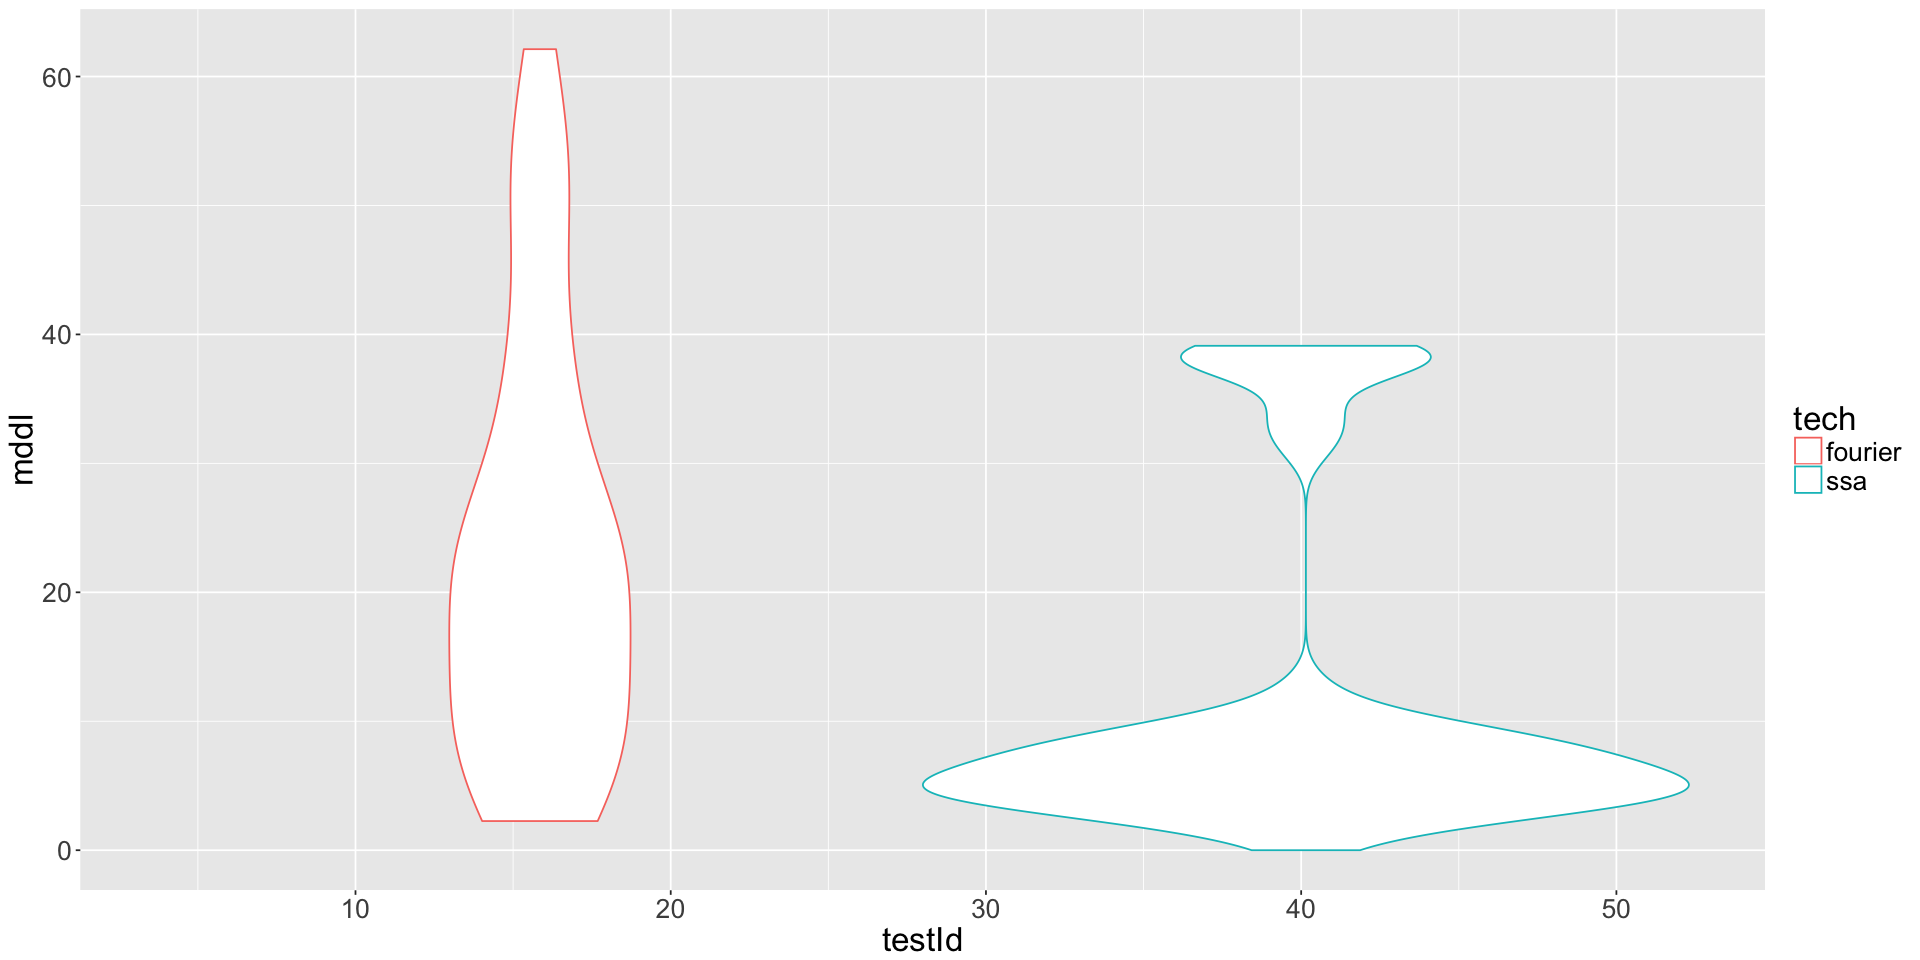

In [19]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mddl_violin.pdf", sep='/'), width=16, height=5)

Métrica: MDA
===

pdf 
  2

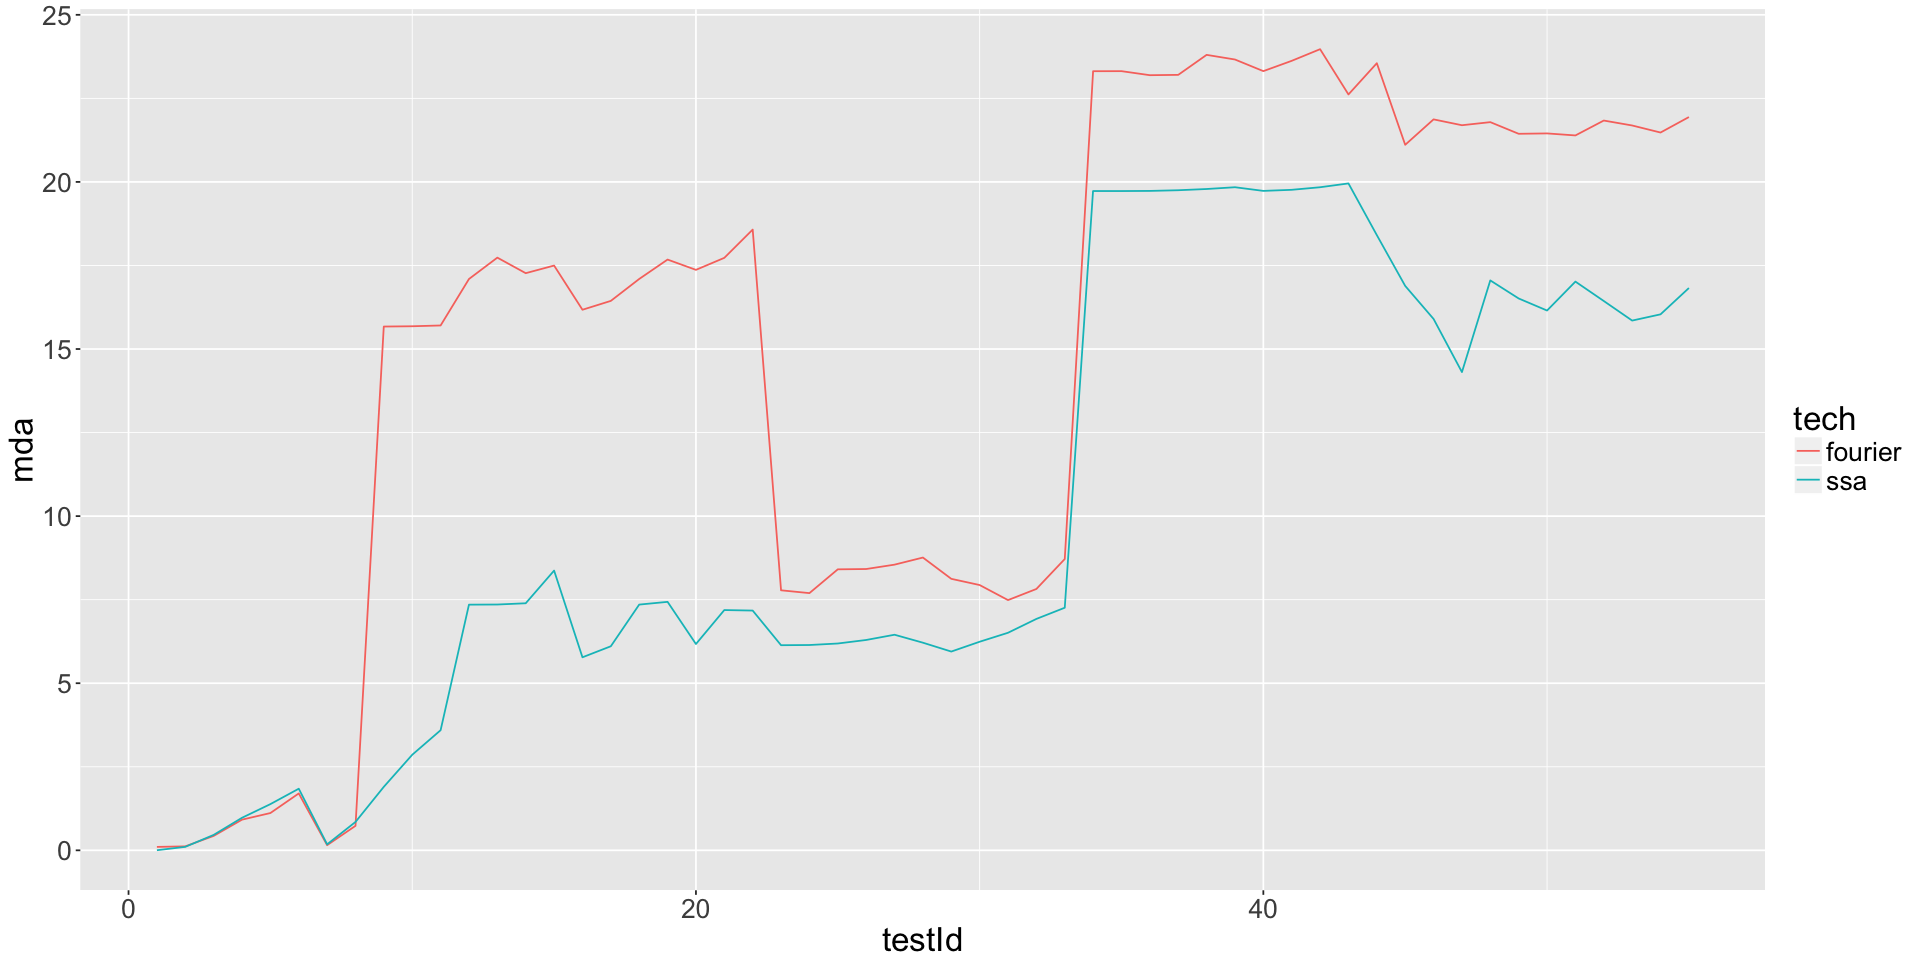

In [20]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line()  + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mda.pdf", sep='/'), width=16, height=5)

In [21]:
n = 'mda'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,15.0535512557707,8.04109645517974
ssa,10.1343027405422,6.88565133781193


pdf 
  2

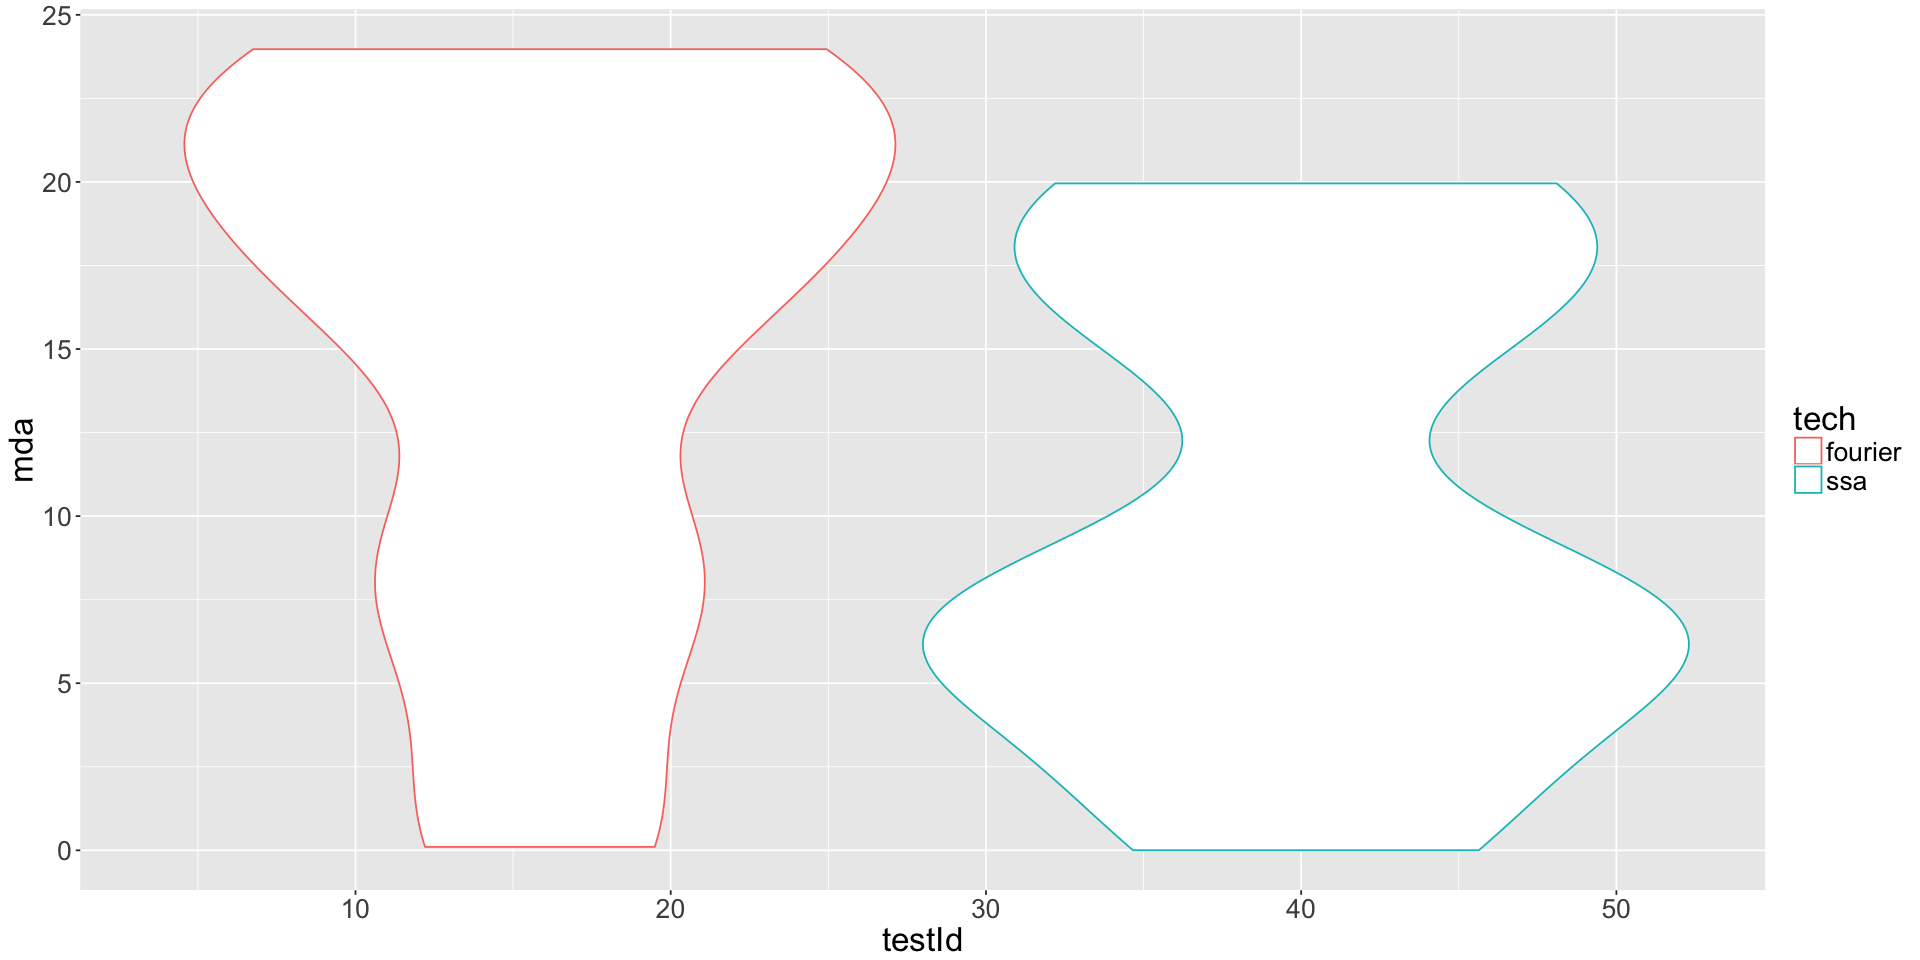

In [22]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mda_violin.pdf", sep='/'), width=16, height=5)

Métrica: Dist
===

pdf 
  2

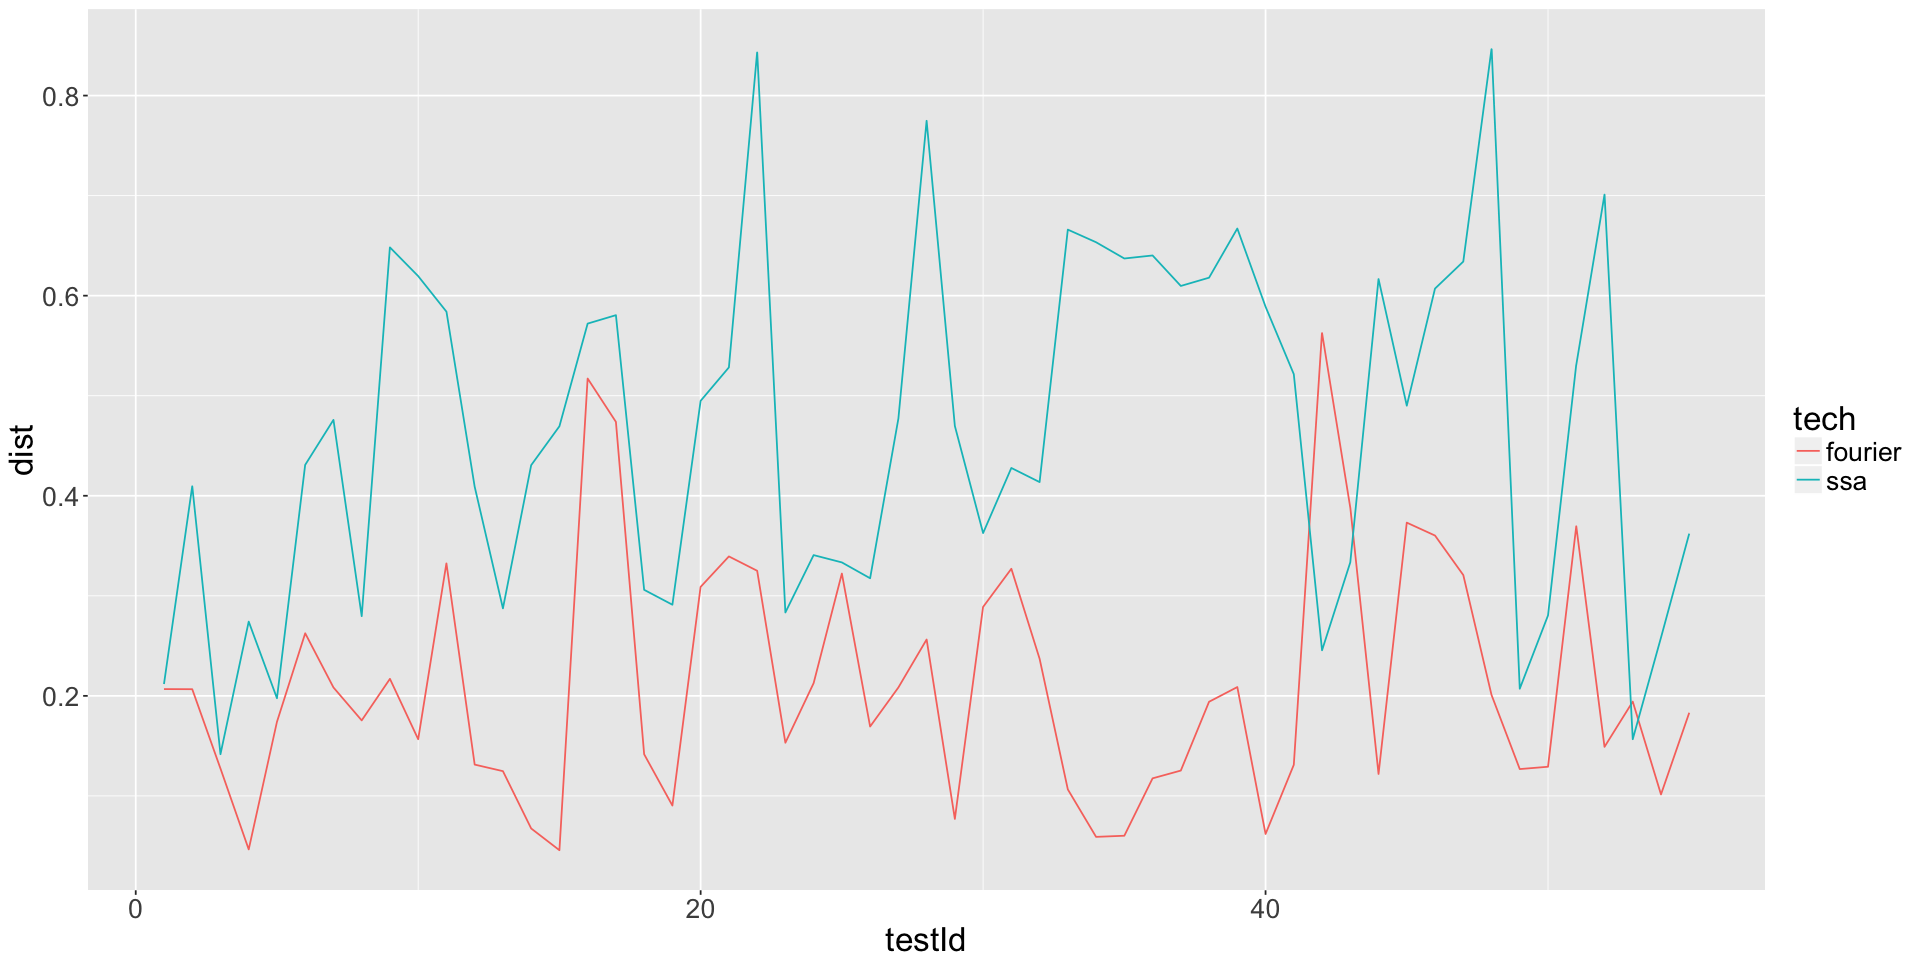

In [23]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
p = ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_line() + theme(text = element_text(size=20))
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist.pdf", sep='/'), width=16, height=5)

In [24]:
n = 'dist'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,0.210492257388602,0.120101179957112
ssa,0.46467998138112,0.176451088794603


pdf 
  2

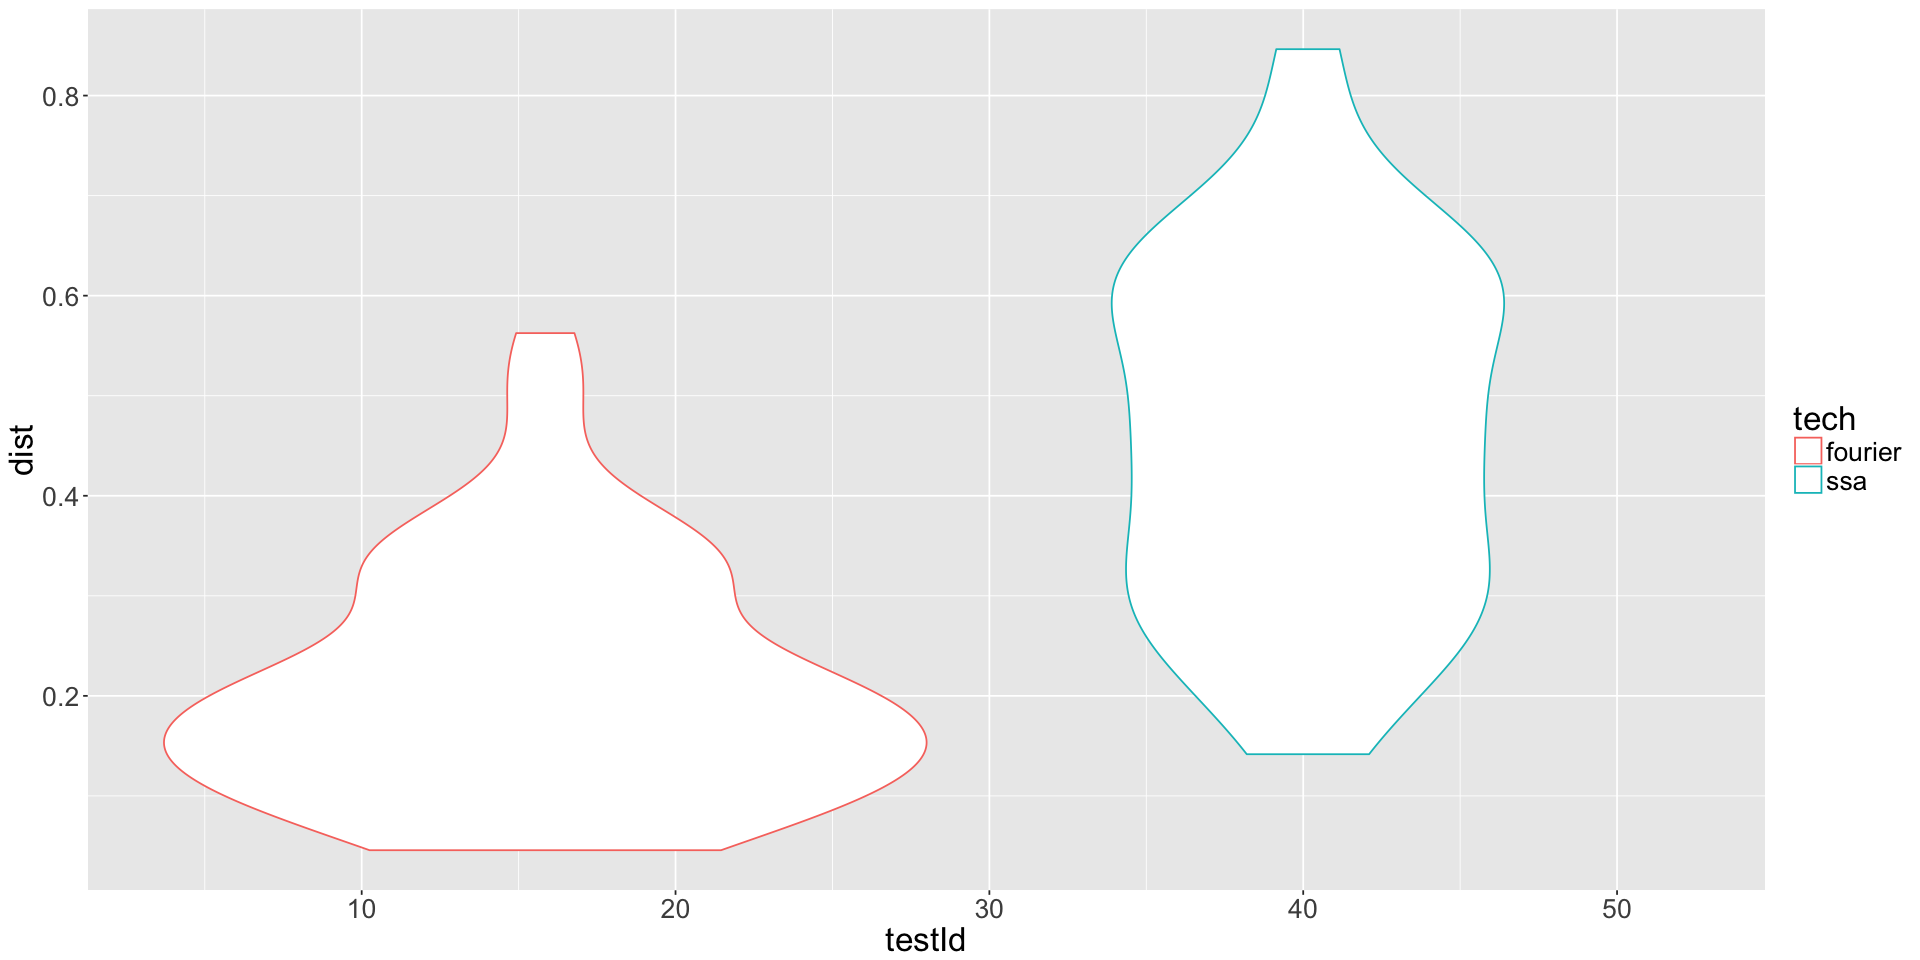

In [25]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_dist_violin.pdf", sep='/'), width=16, height=5)